In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel(r"C:\Users\Daniel.Lang\Downloads\Park Typology Dataset 3.xlsx")

In [3]:
df.rename(columns={2012: '2012', 2016:'2016', 2019:'2019', 2022:'2022'},
    inplace=True)
df.head()

,NPS Full Name,Simplified Name,Park Alpha,Setting,2012,2016,2019,2022,Jan-19,Feb-19,...,Total Parking Area (Acres),Miles of Road/Acre,Acre of Parking/Acre,Transit Y/N,Transit Boardings,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove
0,Abraham Lincoln Birthplace National Historical...,Abraham Lincoln Birthplace,ABLI,rural,169515,252495,238226,265707,1939,6534,...,1.503191,0.002441,0.004363,0,0,NaN,NaN,NaN,NaN,NaN
1,Acadia National Park,Acadia,ACAD,rural,2431052,3303393,3437286,3970260,8532,9154,...,40.037856,0.001938,0.000816,1,414808,NaN,NaN,NaN,1.0,NaN
2,Adams National Historical Park,Adams,ADAM,urban,336031,199301,187400,12848,27,179,...,0.000000,0.000000,0.000000,1,0,NaN,NaN,NaN,NaN,NaN
3,African Burial Ground National Monument,African Burial Ground,AFBG,urban,77624,46526,47427,29743,96,1571,...,0.000000,0.000000,0.000000,0,0,NaN,NaN,NaN,NaN,NaN
4,Agate Fossil Beds National Monument,Agate Fossil Beds,AGFO,rural,11824,15555,16657,16357,0,94,...,1.922567,0.001270,0.000629,0,0,NaN,NaN,NaN,NaN,NaN


In [4]:
voi = df.iloc[:, [0,1,1,7, 35]]

In [5]:
voi.head()

,NPS Full Name,Simplified Name,Simplified Name,2022,Road Length in Park (Mi)
0,Abraham Lincoln Birthplace National Historical...,Abraham Lincoln Birthplace,Abraham Lincoln Birthplace,265707,0.841
1,Acadia National Park,Acadia,Acadia,3970260,95.109
2,Adams National Historical Park,Adams,Adams,12848,0.000
3,African Burial Ground National Monument,African Burial Ground,African Burial Ground,29743,0.000
4,Agate Fossil Beds National Monument,Agate Fossil Beds,Agate Fossil Beds,16357,3.882


In [6]:
voi.loc[:, 'Road Length in Park (Mi)'] = voi['Road Length in Park (Mi)'].astype(float)

C:\Users\Daniel.Lang\AppData\Local\Temp\ipykernel_48792\2445054774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voi.loc[:, 'Road Length in Park (Mi)'] = voi['Road Length in Park (Mi)'].astype(float)


In [7]:
voi.head()

,NPS Full Name,Simplified Name,Simplified Name,2022,Road Length in Park (Mi)
0,Abraham Lincoln Birthplace National Historical...,Abraham Lincoln Birthplace,Abraham Lincoln Birthplace,265707,0.841
1,Acadia National Park,Acadia,Acadia,3970260,95.109
2,Adams National Historical Park,Adams,Adams,12848,0.000
3,African Burial Ground National Monument,African Burial Ground,African Burial Ground,29743,0.000
4,Agate Fossil Beds National Monument,Agate Fossil Beds,Agate Fossil Beds,16357,3.882


In [8]:
column_type = voi['Road Length in Park (Mi)'].dtype
print(column_type)

float64


In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [10]:
data_columns = ['2022','Road Length in Park (Mi)']  
data = voi[data_columns]

In [11]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [12]:
agg_clustering = AgglomerativeClustering(n_clusters=6)  
labels = agg_clustering.fit_predict(data_scaled)

In [13]:
print(labels)


[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 1 1 0 0 0 0 0 0 5 0 0 0
 0 4 0 4 0 0 0 0 4 0 0 0 4 1 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 4 4 0 0 0
 0 0 0 4 0 0 0 0 0 0 0 0 0 4 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 3 0 0 0 0 0 3
 0 0 0 1 1 3 0 0 1 0 1 0 0 0 3 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 4 4
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 1 0 0 0 0 0 0 0 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 4 0 0 2 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 4 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 1 0 0 0 0
 4 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 4 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 4 0 0 0 2 1 0 1]


In [14]:
voi['Cluster_Labels'] = labels

C:\Users\Daniel.Lang\AppData\Local\Temp\ipykernel_48792\3710301622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voi['Cluster_Labels'] = labels


In [15]:
voi.head()

,NPS Full Name,Simplified Name,Simplified Name,2022,Road Length in Park (Mi),Cluster_Labels
0,Abraham Lincoln Birthplace National Historical...,Abraham Lincoln Birthplace,Abraham Lincoln Birthplace,265707,0.841,0
1,Acadia National Park,Acadia,Acadia,3970260,95.109,1
2,Adams National Historical Park,Adams,Adams,12848,0.000,0
3,African Burial Ground National Monument,African Burial Ground,African Burial Ground,29743,0.000,0
4,Agate Fossil Beds National Monument,Agate Fossil Beds,Agate Fossil Beds,16357,3.882,0


In [16]:
from scipy.cluster.hierarchy import dendrogram , linkage

In [18]:
Z = linkage(data_scaled, method = 'ward')

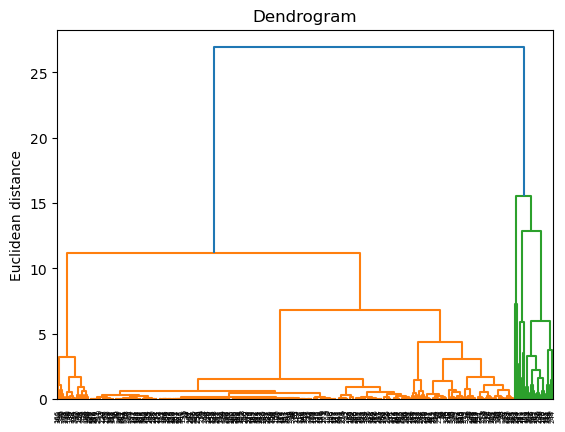

In [19]:
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()